In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *
from SystematicsHelpers import *

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

Welcome to JupyROOT 6.24/06


<h1>Configuration Stuff Here</h1>

In [2]:
m = 240

#savePath = "../plot_files/Systematics/Systematics_1ns_Binning/14April2024_m"+str(m)+"_v3_systematics/"
#savePath = "../plot_files/Systematics/Systematics_Merged_Binning/14April2024_m"+str(m)+"_v3_systematics/"
#savePath = "../plot_files/Systematics/Systematics_Merged_Binning/14April2024_m"+str(m)+"_v3_systematics_stats_only/"
#savePath = "../plot_files/Systematics/Systematics_Merged_Binning_PeakEdge/m"+str(m)+"_v3_systematics/"
#savePath = "../plot_files/Systematics/Systematics_Merged_Binning_PeakEdge_Aggressive/m"+str(m)+"_v3_systematics/"
savePath = "../plot_files/Systematics/Systematics_1ns_Binning_Gaussian_Fit_Bkg/"
suffix = ''

<h3>HNL</h3>

In [3]:
file = open("../pkl_files/v3_April2024/df_postselect_"+suffix+"weight_m"+str(m)+"_v3_hnl.pkl", 'rb')
df_hnl = pickle.load(file)
file.close()

<h3>TPC Neutrino</h3>

In [4]:
file = open("../pkl_files/v3_April2024/df_postselect_"+suffix+"weight_v3_nu.pkl", 'rb')
df_nu = pickle.load(file)
file.close()

<h3>Intime Cosmics</h3>

In [5]:
file = open("../pkl_files/v3_April2024/df_postselect_"+suffix+"weight_v3_cos.pkl", 'rb')
df_cos = pickle.load(file)
file.close()

#should be empty
print(df_cos)

Empty DataFrame
Columns: [run, subrun, event, slc_id, scale_pot, mod_t, slc_comp, slc_true_event_type]
Index: []


In [6]:
df_hnl = df_hnl.reset_index()
df_nu = df_nu.reset_index()
df_cos = df_cos.reset_index()

<h1>Do HNL Scaling</h1>

In [7]:
df_hnl

,index,run,subrun,event,slc_id,slc_comp,slc_flux_weight_total,slc_flux_weight_expskin,slc_flux_weight_horncurrent,slc_flux_weight_kminus,...,slc_flux_weight_piontotxsec,slc_flux_weight_piplus,mod_t,slc_true_event_type,true_counts,start_counts,scale_pot,sim_scale_pot,simU,plotU
0,0,1,509,2,1,0.870061,"[0.7891007, 0.80106324, 0.73414683, 0.75027895...","[1.0430418, 0.93060106, 1.0417949, 0.93376696,...","[0.98985463, 1.0045712, 0.9905932, 0.987087, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.8994923, 0.9506571, 0.9974173, 0.9868151, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",15.672038,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
1,1,1,509,9,1,0.873618,"[0.97226655, 1.2011784, 0.92824596, 1.3023338,...","[0.9649958, 1.0564394, 0.96600986, 1.0538647, ...","[1.0150442, 1.0124946, 1.013949, 1.0191482, 1....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.9863928, 0.99331975, 1.0048468, 1.0247427, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.645373,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
2,2,1,509,10,1,0.996486,"[0.94260275, 0.9943688, 0.82313716, 0.9570794,...","[0.99701506, 1.0048127, 0.99710155, 1.0045933,...","[0.98256636, 0.97986406, 0.9838354, 0.97781044...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.9890828, 0.99464035, 0.9963756, 0.9814975, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",15.013739,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
3,3,1,509,11,1,1.000000,"[0.9520352, 1.1412477, 0.93426025, 1.0531377, ...","[1.0032504, 0.9947592, 1.0031562, 0.9949983, 1...","[0.9966951, 0.99555457, 0.99693567, 0.9957935,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[1.0056915, 1.0027941, 0.99695086, 0.98443407,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2.636859,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
4,4,1,509,20,1,0.925173,"[0.92431515, 1.0947038, 0.8893726, 1.1973199, ...","[0.98786855, 1.0195603, 0.98822, 1.0186679, 0....","[1.0000436, 1.0020081, 1.0000405, 1.0000556, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.98296654, 0.99163765, 0.9999483, 0.99973625...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",14.078788,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17478,17478,1,693,40,1,0.998021,"[0.932011, 1.0366764, 0.8265049, 1.048781, 0.9...","[0.99621856, 1.0060971, 0.9963281, 1.0058188, ...","[0.99562967, 1.0053376, 0.9959478, 0.9944374, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.9982688, 0.9991501, 1.0007082, 1.0036155, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",8.812932,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
17479,17479,1,693,42,2,0.979434,"[1.0795804, 1.0766292, 1.0219676, 1.1739086, 1...","[1.018768, 0.9697394, 1.0182242, 0.9711198, 1....","[0.997255, 1.0128996, 0.9974549, 0.9965062, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.9936503, 0.99688274, 1.0004765, 1.0024323, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",4.269136,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
17480,17480,1,693,45,1,0.959830,"[0.9458203, 1.1524286, 0.87793326, 1.1252002, ...","[0.9751231, 1.0401106, 0.9758438, 1.0382807, 0...","[0.9993268, 1.0146301, 0.9993758, 0.9991432, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.99530536, 0.9976952, 0.99921346, 0.99598485...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",7.028184,0,6891.700624,6304.183146,2.468647,0.114862,1.000000e-07,4.635984e-07
17481,17481,1,693,46,0,1.000000,"[0.97839874, 0.96437293, 1.0693076, 1.0244967,...","[1.0132631, 0.97861505, 1.0128789, 0.9795906, ...","[0.9950586, 1.0069573, 0.9954183, 0.9937106, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[0.98429024

In [8]:
true_counts = df_hnl['true_counts'][0] 
start_counts = df_hnl['true_counts'][0]

simU = df_hnl['simU'].unique()[0]
plotU = df_hnl['plotU'].unique()[0]

scale = (plotU/simU)**2

hnl_scale_factor = df_hnl['scale_pot'].unique()[0]
sim_hnl_scale_factor = df_hnl['sim_scale_pot'].unique()[0]

print("Sim U = {}".format(simU))
print("Sim POT scale factor = {}".format(sim_hnl_scale_factor))
print("----------------------------------------------")
print("Sim to Plot scale by = {}".format(scale))
print("Plot U = {}".format(plotU))
print("Plot POT scale factor = {}".format(hnl_scale_factor))


scale = 1/100
hnl_scale_factor = hnl_scale_factor * scale
fitU = getUfromScaleFactor(plotU, scale)

print("----------------------------------------------")
print("Sim to Plot scale by = {}".format(scale))
print("Fit U = {}".format(fitU))
print("Fit POT scale factor = {}".format(hnl_scale_factor))

Sim U = 1e-07
Sim POT scale factor = 0.11486167706709137
----------------------------------------------
Sim to Plot scale by = 21.49234598021217
Plot U = 4.635983820098186e-07
Plot POT scale factor = 2.468646903393329
----------------------------------------------
Sim to Plot scale by = 0.01
Fit U = 4.635983820098186e-08
Fit POT scale factor = 0.024686469033933293


<h1>Separate Cosmics Sample </h1>

In [9]:
df_cos_nu = df_nu[df_nu['slc_true_event_type'] == 9]
df_cos_hnl = df_hnl[df_hnl['slc_true_event_type'] == 9]

df_nu = df_nu[df_nu['slc_true_event_type'] != 9]
df_hnl = df_hnl[df_hnl['slc_true_event_type'] != 9]

In [10]:
#keep_branches = [ "run", "subrun", "event", "slc_id", "slc_comp", "scale_pot", "mod_t"]
keep_branches = [ "scale_pot", "mod_t"]

df_cos_nu = df_cos_nu[keep_branches]
df_cos_hnl = df_cos_hnl[keep_branches]

print("Cosmics #events from Rockbox = {}".format(len(df_cos_nu)))
print("Cosmics #events from HNL = {}".format(len(df_cos_hnl)))

df_cos = pd.concat([df_cos_nu])#, df_cos_hnl])
print("Cosmics #events = {}".format(len(df_cos)))

Cosmics #events from Rockbox = 4
Cosmics #events from HNL = 29
Cosmics #events = 4


<h3>Rockbox Cosmics</h3>

In [11]:
print(bins)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0]
4
[0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632
 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632
 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632
 0.21052632]
3.999999999999999
[0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632
 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632
 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632 0.21052632
 0.21052632]
3.999999999999999


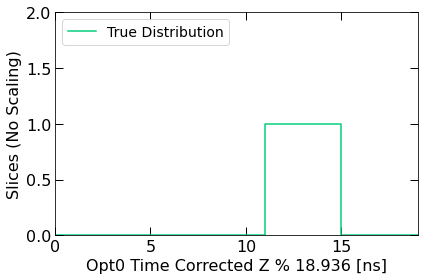

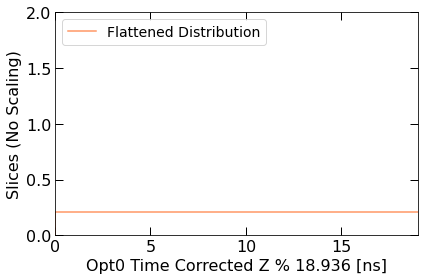

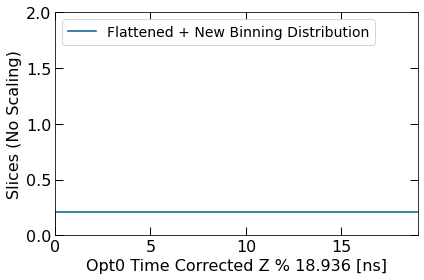

In [12]:
even_bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
even_bins_mid = np.convolve(even_bins, [0.5, 0.5], "valid")

cos_true =[]
cos_true, _ = np.histogram(np.array(df_cos['mod_t']), bins=even_bins)

print(cos_true)
print(cos_true.sum())

#fill bins intergral = number of bins 
cos_flat = np.array([len(df_cos)/ 19] * 19)
print(cos_flat)
print(cos_flat.sum())

cos_flat_rebin = []

#rebin flat distribution into the chosen bins
for first, second in zip(bins, bins[1:]):
    #print(first, second)
    #print(cos_flat[first:second])
    first = int(first)
    second = int(second)
    cos_flat_rebin.append(cos_flat[first:second].sum())   
    
cos_flat_rebin = np.array(cos_flat_rebin)
print(cos_flat_rebin)
print(cos_flat_rebin.sum())

#=================================================================#
fig, ax1 = plt.subplots(1,1, figsize = (6,4))
#-----------------------------------------------------------------#
ax1.step(even_bins, np.insert(cos_true, 0, 0)
         , color = cos_col
         , label =  "True Distribution"
)
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)

plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(0, 2)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+"true_rockbox_cosmics", dpi=200)
plt.show()

#=================================================================#
fig, ax2 = plt.subplots(1,1, figsize = (6,4))
#-----------------------------------------------------------------#
ax2.step(even_bins, np.insert(cos_flat, 0, 0)
         , color = col_dict["Peach"]
         , label =  "Flattened Distribution"
)
#-----------------------------------------------------------------#
ax2.legend(loc = 'upper left',fontsize = 14)

plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  "Slices (No Scaling)", 16)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(0, 2)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+"flatten_rockbox_cosmics", dpi=200)
plt.show()
#=================================================================#
fig, ax3 = plt.subplots(1,1, figsize = (6,4))
#-----------------------------------------------------------------#
ax3.step(bins, np.insert(cos_flat_rebin, 0, 0)
         , color = col_dict["Teal"]
         , label =  "Flattened + New Binning Distribution"
)
#-----------------------------------------------------------------#
ax3.legend(loc = 'upper left',fontsize = 14)

plot_tick(ax3, 16)
plot_title(ax3, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  "Slices (No Scaling)", 16)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(0, 2)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+"rebin_rockbox_cosmics", dpi=200)
plt.show()

[0 2 0 0 0 2 3 2 3 0 1 4 1 5 1 0 0 5 0]
29
[1.52631579 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579
 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579
 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579
 1.52631579]
29.000000000000004
[1.52631579 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579
 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579
 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579 1.52631579
 1.52631579]
29.000000000000004


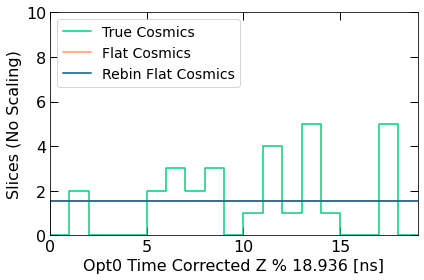

In [13]:
cos_true_hnl =[]
cos_true_hnl, _ = np.histogram(np.array(df_cos_hnl['mod_t']), bins=even_bins)

print(cos_true_hnl)
print(cos_true_hnl.sum())

#fill bins intergral = number of bins 
cos_flat_hnl = np.array([len(df_cos_hnl)/ 19] * 19)
print(cos_flat_hnl)
print(cos_flat_hnl.sum())

cos_flat_rebin_hnl = []

#rebin flat distribution into the chosen bins
for first, second in zip(bins, bins[1:]):
    first = int(first)
    second = int(second)
    cos_flat_rebin_hnl.append(cos_flat_hnl[first:second].sum())   
    
cos_flat_rebin_hnl = np.array(cos_flat_rebin_hnl)
print(cos_flat_rebin_hnl)
print(cos_flat_rebin_hnl.sum())

#=================================================================#

fig, ax = plt.subplots(1,1, figsize = (6,4))
#-----------------------------------------------------------------#
ax.step(even_bins, np.insert(cos_true_hnl, 0, 0)
         , color = cos_col
         , label =  "True Cosmics"
)
#-----------------------------------------------------------------#
ax.step(even_bins, np.insert(cos_flat_hnl, 0, 0)
         , color = col_dict["Peach"]
         , label =  "Flat Cosmics"
)
#-----------------------------------------------------------------#
ax.step(bins, np.insert(cos_flat_rebin_hnl, 0, 0)
         , color = col_dict["Teal"]
         , label =  "Rebin Flat Cosmics"
)
#-----------------------------------------------------------------#
ax.legend(loc = 'upper left',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 10)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+"_flatten_and_rebin_HNL_cosmics", dpi=200)
plt.show()

<h1>Separate Neutrinos sample</h1>

In [14]:
unique_pot = df_nu['scale_pot'].unique()

rockbox_scale_factor = 1
ncpi0_scale_factor = 1
ccnue_scale_factor = 1

for p in unique_pot:
    if round(p) == 22:
        rockbox_scale_factor = p
    if round(p) == 4:
        ncpi0_scale_factor = p
    if round(p) == 1:
        ccnue_scale_factor = p

print("----------------------------------------------")
print("POT scale factor in the array = {}".format(unique_pot))
print("Rockbox = {}".format(rockbox_scale_factor))
print("NCPi0 = {}".format(ncpi0_scale_factor))
print("CCnue = {}".format(ccnue_scale_factor))
        
df_nu_rockbox = df_nu[df_nu['scale_pot'] ==  rockbox_scale_factor]
df_nu_ncpi0 = df_nu[df_nu['scale_pot'] ==  ncpi0_scale_factor]
df_nu_ccnue = df_nu[df_nu['scale_pot'] ==  ccnue_scale_factor]

print("----------------------------------------------")
print("total nu #events = {}".format(len(df_nu)))
print("rockbox #events = {}".format(len(df_nu_rockbox)))
print("ncpi0 #events = {}".format(len(df_nu_ncpi0)))
print("ccnue #events = {}".format(len(df_nu_ccnue)))

----------------------------------------------
POT scale factor in the array = [ 4.12683467  1.29413675 22.16498266]
Rockbox = 22.16498266245211
NCPi0 = 4.1268346716793225
CCnue = 1.2941367532561456
----------------------------------------------
total nu #events = 2346
rockbox #events = 79
ncpi0 #events = 1631
ccnue #events = 636


<h1> Organise Some Stuff</h1>

In [15]:
hnl_dict = {}
hnl_cos_dict = {}

rockbox_dict = {}
ncpi0_dict = {}
ccnue_dict = {}

cos_dict = {}

cos_error_list = ['stat']

#hnl_error_list = ['stat', 'flx', 'mistagging']
hnl_error_list = ['stat', 'mistagging']

#nu_error_list = ['stat', 'flx', 'xsec', 'g4']
nu_error_list = ['stat']

In [16]:
hnl_label = str(m) + r' MeV HNL $\nu\pi^0$' + '\n' + '|U$_{{\mu 4}}$|$^{{2}}$ = ' +str(sci_notation(fitU,2,2))
nu_label = "Neutrinos"
rockbox_label = "Rockbox Neutrinos"
ncpi0_label = r"NC $\pi^{0}$"
ccnue_label = r"CC $\nu_{e}$"
cos_label = "Cosmics"

<h1>Plot Individual Sample</h1>

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


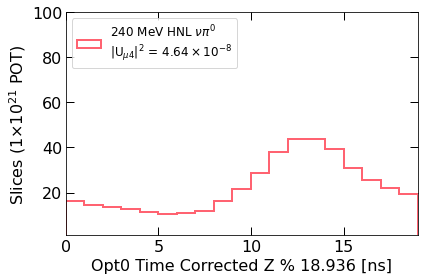

In [17]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
print(bins)
#-----------------------------------------------------------------#
pltdf = df_hnl['mod_t']
weights = [hnl_scale_factor]*len(df_hnl['mod_t']) 

_, _, _ = ax1.hist(
                            pltdf,
                            bins = bins, 
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = hnl_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = hnl_label
                        )

#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1, 100)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+str("hnl_cv.png"), dpi=200)
    
plt.show()

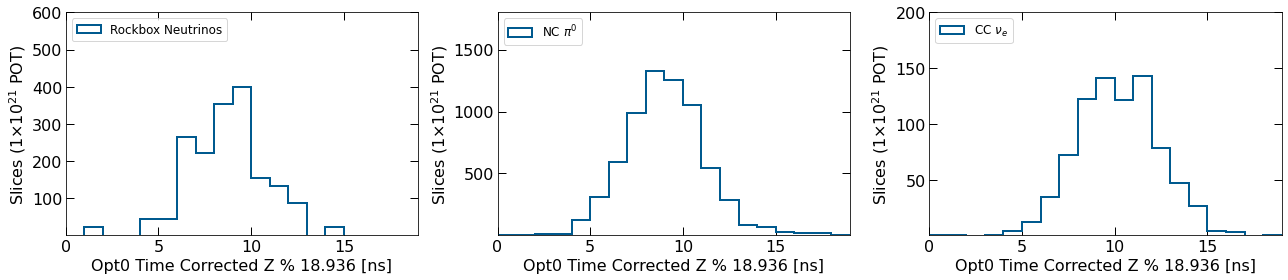

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,4))

#-----------------------------------------------------------------#
pltdf = df_nu_rockbox['mod_t']
weights = df_nu_rockbox['scale_pot']
_, _, _ = ax1.hist(
                            pltdf,
                            bins = bins, 
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = nu_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = rockbox_label
                        )
#-----------------------------------------------------------------#
pltdf = df_nu_ncpi0['mod_t']
weights = df_nu_ncpi0['scale_pot']
_, _, _ = ax2.hist(
                            pltdf,
                            bins = bins, 
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = nu_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = ncpi0_label
                        )
#-----------------------------------------------------------------#
pltdf = df_nu_ccnue['mod_t']
weights = df_nu_ccnue['scale_pot']
_, _, _ = ax3.hist(
                            pltdf,
                            bins = bins, 
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = nu_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = ccnue_label
                        )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1, 600)
#-----------------------------------------------------------------#
ax2.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(1, 1800)
#-----------------------------------------------------------------#
ax3.legend(loc = 'upper left',fontsize = 12)
plot_tick(ax3, 16)
plot_title(ax3, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(1, 200)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+str("neutrino_cv.png"), dpi=200)
    
plt.show()

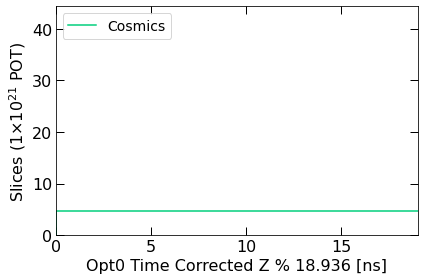

In [19]:
fig, ax = plt.subplots(1,1, figsize = (6,4))

#-----------------------------------------------------------------#
ax.step(bins, np.insert(cos_flat_rebin*rockbox_scale_factor, 0, 0)
         , color = cos_col
         , label =  "Cosmics"
)
#-----------------------------------------------------------------#
ax.legend(loc = 'upper left',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(0, 2 * rockbox_scale_factor)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+str("cosmics_cv.png"), dpi=200)
plt.show()

<h1>Plot Overlay Sample</h1>

----------------------------------------------
Sim to Plot scale by = 0.01
Fit U = 4.635983820098186e-08
Fit POT scale factor = 0.024686469033933293


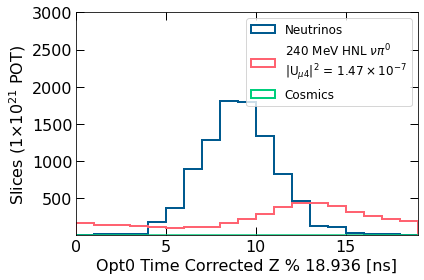

In [20]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#

pltdf = df_nu['mod_t']
weights = df_nu['scale_pot']
_, _, _ = ax1.hist(
                            pltdf,
                            bins = bins, 
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = nu_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = nu_label
                        )
#-----------------------------------------------------------------#
scale_up_just_once = 10

hnl_scale_up_just_once = hnl_scale_factor * scale_up_just_once
U_scale_up_just_once = getUfromScaleFactor(fitU, scale_up_just_once)

print("----------------------------------------------")
print("Sim to Plot scale by = {}".format(scale))
print("Fit U = {}".format(fitU))
print("Fit POT scale factor = {}".format(hnl_scale_factor))

this_hnl_label = str(m) + r' MeV HNL $\nu\pi^0$' + '\n' + '|U$_{{\mu 4}}$|$^{{2}}$ = ' +str(sci_notation(U_scale_up_just_once,2,2))
#-----------------------------------------------------------------#
pltdf = df_hnl['mod_t']
weights = [hnl_scale_factor*scale_up_just_once]*len(df_hnl['mod_t']) 

_, _, _ = ax1.hist(
                            pltdf,
                            bins = bins, 
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = hnl_col,
                            linestyle = "-",
                            linewidth = 2,
                            label = this_hnl_label
                        )
#-----------------------------------------------------------------#
ax1.step(bins, np.insert(cos_flat_rebin*rockbox_scale_factor, 0, 0)
         , color = cos_col
         , label =  "Cosmics"
)
#-----------------------------------------------------------------#

plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % 18.936 [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(1, 3000)

handles, labels = plt.gca().get_legend_handles_labels()
handles[-1] =extra = Rectangle((0, 0), 0.1, 0.1, fc="w", fill=False, edgecolor=cos_col, linewidth=2.0)

ax1.legend(handles, labels, loc = 'upper right',fontsize = 12)
#ax1.set_yscale('log')
#ax1.set_ylim(1, 1000000)
#-----------------------------------------------------------------#
fig.tight_layout()

plt.savefig(savePath+str("signal_bkg_overlay_cv.png"), dpi=200)
    
plt.show()

<h1>HNL</h1>

<h3>Statistics</h3>

In [ ]:
#bin it
hnl_cv, _ = np.histogram(np.array(df_hnl['mod_t']), bins = bins)

#No Scale
print("\nprescale: entries per bin")
print(hnl_cv)

#Make covariance matrix
hnl_stat_cov = np.diag(hnl_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
hnl_stat_err = np.sqrt(np.diag(hnl_stat_cov))

print("\n stat err")
print(hnl_stat_err)

#save in dictionary
hnl_cv_plot = np.insert(hnl_cv, 0, 0)

hnl_dict['cv'] = hnl_cv
hnl_dict['cv_plot'] = hnl_cv_plot

hnl_dict['stat_cov'] = hnl_stat_cov
hnl_dict['stat_err'] = hnl_stat_err

#plot and save
plot_hatchy_hatch(hnl_dict, hnl_label, "hnl", "stat_err")

plt.savefig(savePath+str("hnl_statistics_error.png"), dpi=200)
    
plt.show()

<h3>Flux</h3>

In [ ]:
#Make covariance matrix per variable
hnl_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000, df_hnl, hnl_dict, 'hnl', savePath)

#Add them together
hnl_flx_cov = new_empty_cov()

for cov in hnl_flx_cov_array:
    hnl_flx_cov = hnl_flx_cov + cov
    
hnl_flx_err = np.sqrt(np.diag(hnl_flx_cov))

#save in dictionary
hnl_dict['flx_cov'] = hnl_flx_cov
hnl_dict['flx_err'] = hnl_flx_err

#plot it
plot_hatchy_hatch(hnl_dict, hnl_label, "hnl", "flx_err")

plt.savefig(savePath+str("hnl_flux_error.png"), dpi=200)
    
plt.show()

<h3>Cosmics As Mistagging Events</h3>

In [ ]:
#Make covariance matrix
hnl_mistagging_cov = np.outer(cos_flat_rebin_hnl, cos_flat_rebin_hnl)
hnl_mistagging_err = np.sqrt(np.diag(hnl_mistagging_cov))

print("\n Mistagging err")
print(hnl_mistagging_err)

#save in dictionary
hnl_dict['mistagging_cov'] = hnl_mistagging_cov
hnl_dict['mistagging_err'] = hnl_mistagging_err

#plot it
plot_hatchy_hatch(hnl_dict, hnl_label, "hnl", "mistagging_err")

plt.savefig(savePath+str("hnl_mistagging_error.png"), dpi=200)
    
plt.show()

<h3>Combine Errors</h3>

In [ ]:
combine_error(hnl_dict, hnl_error_list)

#plot it
plot_combine_err(hnl_dict, "hnl", hnl_label, hnl_error_list)

plt.savefig(savePath+str("hnl_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3>Scale To POT AND Umu Coupling</h3>

In [ ]:
scale_cov_matrix(hnl_dict, hnl_scale_factor, hnl_error_list)

In [ ]:
plot_combine_err(hnl_dict, "hnl", hnl_label, hnl_error_list
                  , ifScale = True , scaleYmax = hnl_scale_factor, suffix = '_scale')

plt.savefig(savePath+str("hnl_beam_bucket_combined_covariance_scaled.png"), dpi=200)
    
plt.show()

<h1>Rockbox Neutrino</h1>

<h3>Statistics</h3>


prescale: entries per bin
[ 0  1  0  0  2  2 12 10 16 18  7  6  4  0  1  0  0  0  0]


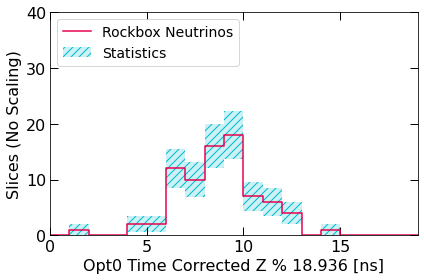

In [22]:
#bin it
rockbox_cv, _ = np.histogram(np.array(df_nu_rockbox['mod_t']), bins = bins)

rockbox_dict['cv'] = rockbox_cv
rockbox_dict['cv_plot'] =  np.insert(rockbox_cv, 0, 0)

rockbox_dict['stat_cov'] = np.diag(rockbox_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
rockbox_dict['stat_err'] = np.sqrt(np.diag(rockbox_dict['stat_cov']))

#No Scale
print("\nprescale: entries per bin")
print(rockbox_dict['cv'] )

#===========================================================================#

#plot and save
plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "stat_err")

plt.savefig(savePath+str("rockbox_stats_error.png"), dpi=200)
    
plt.show()

<h3>Flux</h3>

In [ ]:
rockbox_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000
                                                    , df_nu_rockbox, rockbox_dict, 'rockbox'
                                                    , savePath)

#Add them together
rockbox_flx_cov = new_empty_cov()

for cov in rockbox_flx_cov_array:
    rockbox_flx_cov = rockbox_flx_cov + cov
    
rockbox_flx_err = np.sqrt(np.diag(rockbox_flx_cov))

rockbox_dict['flx_cov'] = rockbox_flx_cov
rockbox_dict['flx_err'] = rockbox_flx_err

#plot it

plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "flx_err")

plt.savefig(savePath+str("rockbox_flux_error.png"), dpi=200)
    
plt.show()

<h3>Cross-Section: UniSim</h3>

In [ ]:
for name in unisim_list:
    df_nu_rockbox[name] = df_nu_rockbox[name].apply(lambda row: check_unisim(row))

In [ ]:
rockbox_unisim_cov_array = loopy_loop_unisim(df_nu_rockbox, rockbox_dict, "rockbox", savePath)

<h3>Cross-Section: Multi-Sigma</h3>

In [ ]:
#make a random gaussian gun
mu, sigma = 0, 1 # mean and standard deviation
n_univ = len(df_nu['slc_xsec_multisim_total'][0])

random_arr = np.random.normal(mu, sigma, n_univ)
len_univ = np.arange(0, n_univ)
plt.hist(random_arr)

In [ ]:
rockbox_multisigma_cov_arr = loopy_loop_multisigma(multisigma_list, multisigma_list, random_arr
                                                   , df_nu_rockbox, rockbox_dict, "rockbox"
                                                   , savePath
                                                  )

<h3>Cross-Section: Multi-Sim</h3>

In [ ]:
rockbox_multisim_cov_array =loopy_loop_multisim_universe(multisim_list, multisim_list, 500
                                                         , df_nu_rockbox, rockbox_dict, 'rockbox'
                                                         , savePath
                                                        )

<h3>Cross-Section: Combined</h3>

In [ ]:
print(len(rockbox_unisim_cov_array))
print(len(rockbox_multisigma_cov_arr))
print(len(rockbox_multisim_cov_array))

rockbox_xsec_cov_array = rockbox_unisim_cov_array + rockbox_multisigma_cov_arr + rockbox_multisim_cov_array
print(len(rockbox_xsec_cov_array))

rockbox_xsec_cov = new_empty_cov()

for cov in rockbox_xsec_cov_array:
    rockbox_xsec_cov = rockbox_xsec_cov + cov
    
rockbox_xsec_err = np.sqrt(np.diag(rockbox_xsec_cov))

rockbox_dict['xsec_cov'] = rockbox_xsec_cov
rockbox_dict['xsec_err'] = rockbox_xsec_err

In [ ]:
plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "xsec_err")

plt.savefig(savePath+str("rockbox_xsec_error.png"), dpi=200)
    
plt.show()

<h3>Geant4 Re-Interactions</h3>

In [ ]:
rockbox_g4_cov = loopy_loop_multisim_universe(g4_list, g4_name, 1000, df_nu_rockbox, rockbox_dict, "rockbox", savePath)
rockbox_g4_cov = rockbox_g4_cov[0]

rockbox_g4_err = np.sqrt(np.diag(rockbox_g4_cov))

#save it
rockbox_dict['g4_cov'] = rockbox_g4_cov
rockbox_dict['g4_err'] = rockbox_g4_err
print(rockbox_g4_err)

#plot it
plot_hatchy_hatch(rockbox_dict, rockbox_label, "rockbox", "g4_err")

plt.savefig(savePath+str("rockbox_g4_error.png"), dpi=200)
    
plt.show()

<h3> Combine Errors </h3>

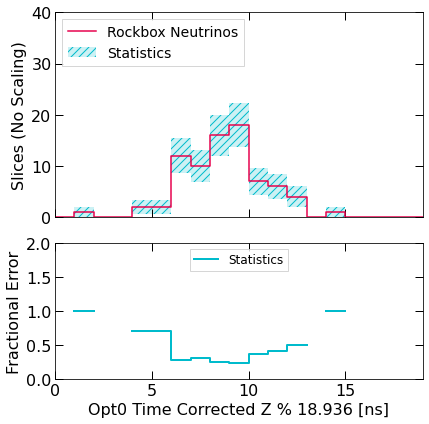

In [23]:
combine_error(rockbox_dict, nu_error_list)

#plot it
plot_combine_err(rockbox_dict, "rockbox", rockbox_label, nu_error_list, ifStatOnly = True)

plt.savefig(savePath+str("rockbox_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3> Scale to POT </h3>

22.16498266245211


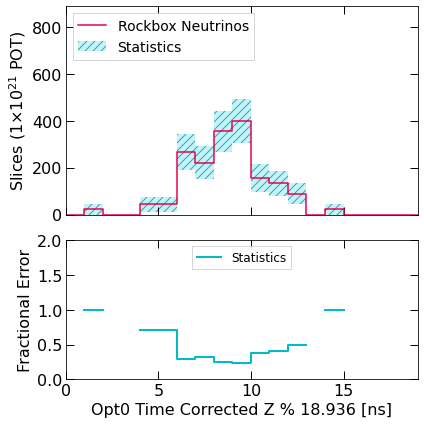

In [24]:
print(rockbox_scale_factor)

scale_cov_matrix(rockbox_dict, rockbox_scale_factor, nu_error_list)

#plot it
plot_combine_err(rockbox_dict, "rockbox", rockbox_label, nu_error_list
                  , ifScale = True , scaleYmax = rockbox_scale_factor, suffix ='_scale', ifStatOnly = True)

plt.savefig(savePath+str("rockbox_beam_bucket_combined_covariance_scaked.png"), dpi=200)
    
plt.show()

<h1>NCPi0</h1>

<h3>Statistics</h3>


prescale: entries per bin
[  0   0   3   3  30  76 143 240 321 304 256 132  70  20  16   6   5   5
   1]


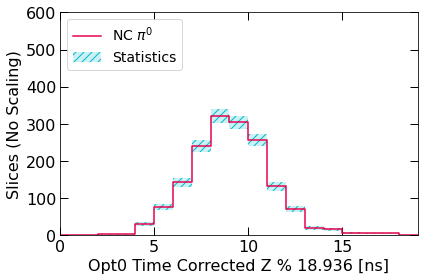

In [25]:
#bin it
ncpi0_cv, _ = np.histogram(np.array(df_nu_ncpi0['mod_t']), bins = bins)

ncpi0_dict['cv'] = ncpi0_cv
ncpi0_dict['cv_plot'] =  np.insert(ncpi0_cv, 0, 0)

ncpi0_dict['stat_cov'] = np.diag(ncpi0_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
ncpi0_dict['stat_err'] = np.sqrt(np.diag(ncpi0_dict['stat_cov']))

#No Scale
print("\nprescale: entries per bin")
print(ncpi0_dict['cv'] )

#===========================================================================#

#plot and save
plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "stat_err")

plt.savefig(savePath+str("ncpi0_stats_error.png"), dpi=200)

plt.show()                                                                                                                                

<h3>Flux</h3>

In [ ]:
ncpi0_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000, df_nu_ncpi0, ncpi0_dict, 'ncpi0', savePath)

#add cov matrix
ncpi0_flx_cov = new_empty_cov()

for cov in ncpi0_flx_cov_array:
    ncpi0_flx_cov = ncpi0_flx_cov + cov
    
ncpi0_flx_err = np.sqrt(np.diag(ncpi0_flx_cov))

ncpi0_dict['flx_cov'] = ncpi0_flx_cov
ncpi0_dict['flx_err'] = ncpi0_flx_err

#plot it

plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "flx_err")

plt.savefig(savePath+str("ncpi0_flx_err.png"), dpi=200)

<h3>Cross-Section: UniSim</h3>

In [ ]:
for name in unisim_list:
    
    df_nu_ncpi0[name] = df_nu_ncpi0[name].apply(lambda row: check_unisim(row))

In [ ]:
ncpi0_unisim_cov_array = loopy_loop_unisim(df_nu_ncpi0, ncpi0_dict, "ncpi0", savePath)

<h3>Cross-Section: Multi-Sigma</h3>

In [ ]:
ncpi0_multisigma_cov_arr = loopy_loop_multisigma(multisigma_list, multisigma_list, random_arr
                                                 , df_nu_ncpi0, ncpi0_dict, "ncpi0"
                                                 , savePath
                                                )

<h3>Cross-Section: Multi-Sim</h3>

In [ ]:
ncpi0_multisim_cov_array =loopy_loop_multisim_universe(multisim_list, multisim_list, 500
                                                       , df_nu_ncpi0, ncpi0_dict, 'ncpi0'
                                                       , savePath
                                                      )

<h3>Cross-Section: Combined</h3>

In [ ]:
print(len(ncpi0_unisim_cov_array))
print(len(ncpi0_multisigma_cov_arr))
print(len(ncpi0_multisim_cov_array))

ncpi0_xsec_cov_array = ncpi0_unisim_cov_array  + ncpi0_multisigma_cov_arr + ncpi0_multisim_cov_array
print(len(ncpi0_xsec_cov_array))

ncpi0_xsec_cov = new_empty_cov()

for cov in ncpi0_xsec_cov_array:
    ncpi0_xsec_cov = ncpi0_xsec_cov + cov
    
ncpi0_xsec_err = np.sqrt(np.diag(ncpi0_xsec_cov))

ncpi0_dict['xsec_cov'] = ncpi0_xsec_cov
ncpi0_dict['xsec_err'] = ncpi0_xsec_err

print(ncpi0_xsec_err)

#plot it
plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "xsec_err")

plt.savefig(savePath+str("ncpi0_xsec_err.png"), dpi=200)

<h3>Geant4 Re-Interactions</h3>

In [ ]:
ncpi0_g4_cov = loopy_loop_multisim_universe(g4_list, g4_name, 1000, df_nu_ncpi0, ncpi0_dict, "ncpi0", savePath)
ncpi0_g4_cov = ncpi0_g4_cov[0]

ncpi0_g4_err = np.sqrt(np.diag(ncpi0_g4_cov))

ncpi0_dict['g4_cov'] = ncpi0_g4_cov
ncpi0_dict['g4_err'] = ncpi0_g4_err
print(ncpi0_g4_err)

#plot it
plot_hatchy_hatch(ncpi0_dict, ncpi0_label, "ncpi0", "g4_err")

plt.savefig(savePath+str("ncpi0_g4_error.png"), dpi=200)
    
plt.show()

<h3>Combine Errors</h3>

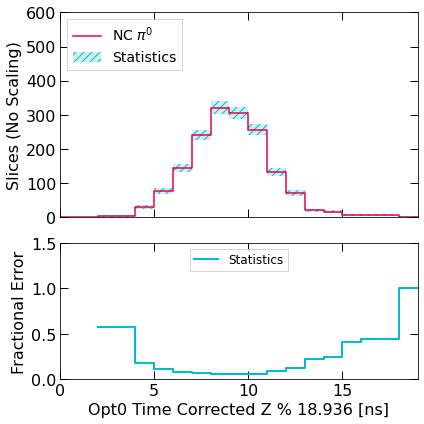

In [26]:
combine_error(ncpi0_dict, nu_error_list)

#plot it
plot_combine_err(ncpi0_dict, "ncpi0", ncpi0_label, nu_error_list, ifStatOnly = True)

plt.savefig(savePath+str("ncpi0_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3>Scale to POT </h3>

4.1268346716793225


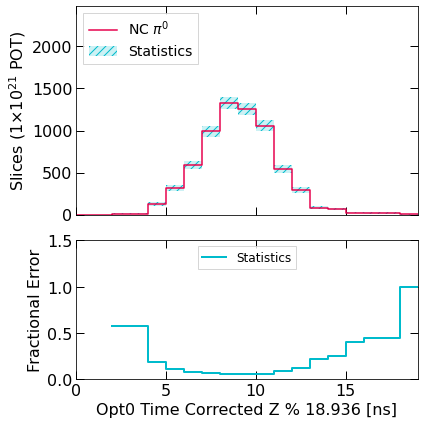

In [27]:
print(ncpi0_scale_factor)

scale_cov_matrix(ncpi0_dict, ncpi0_scale_factor, nu_error_list)

#plot it
plot_combine_err(ncpi0_dict, "ncpi0", ncpi0_label, nu_error_list
                 , ifScale = True, scaleYmax = ncpi0_scale_factor, suffix ='_scale', ifStatOnly = True)

plt.savefig(savePath+str("ncpi0_beam_bucket_combined_covariance_scaked.png"), dpi=200)
    
plt.show()

<h1>CCNue</h1>

<h3>Statistics</h3>


prescale: entries per bin
[  1   1   0   1   4  10  27  56  95 109  94 111  61  37  21   4   3   0
   1]


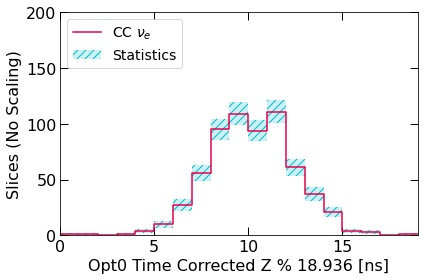

In [28]:
#bin it
ccnue_cv, _ = np.histogram(np.array(df_nu_ccnue['mod_t']), bins = bins)

ccnue_dict['cv'] = ccnue_cv
ccnue_dict['cv_plot'] =  np.insert(ccnue_cv, 0, 0)

ccnue_dict['stat_cov'] = np.diag(ccnue_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
ccnue_dict['stat_err'] = np.sqrt(np.diag(ccnue_dict['stat_cov']))

#No Scale
print("\nprescale: entries per bin")
print(ccnue_dict['cv'] )

#===========================================================================#

#plot and save
plot_hatchy_hatch(ccnue_dict, ccnue_label, "ccnue", "stat_err")

plt.savefig(savePath+str("ccnue_stats_error.png"), dpi=200)

plt.show()

<h3>Flux</h3>

In [ ]:
ccnue_flx_cov_array =loopy_loop_multisim_universe(flux_list, flux_name, 1000, df_nu_ccnue, ccnue_dict, 'ccnue', savePath)

#add cov matrix
ccnue_flx_cov = new_empty_cov()

for cov in ccnue_flx_cov_array:
    ccnue_flx_cov = ccnue_flx_cov + cov
    
ccnue_flx_err = np.sqrt(np.diag(ccnue_flx_cov))

ccnue_dict['flx_cov'] = ccnue_flx_cov
ccnue_dict['flx_err'] = ccnue_flx_err

#plot it

plot_hatchy_hatch(ccnue_dict, ccnue_label, "ccnue", "flx_err")

plt.savefig(savePath+str("ccnue_flx_err.png"), dpi=200)


<h3>Cross-Section: Unisim</h3>

In [ ]:
for name in unisim_list:
    
    df_nu_ccnue[name] = df_nu_ccnue[name].apply(lambda row: check_unisim(row))

In [ ]:
ccnue_unisim_cov_array = loopy_loop_unisim(df_nu_ccnue, ccnue_dict, "ccnue", savePath)

<h3>Cross-Section: Multi-Sigma</h3>

In [ ]:
ccnue_multisigma_cov_arr = loopy_loop_multisigma(multisigma_list, multisigma_list, random_arr
                                                 , df_nu_ccnue, ccnue_dict, "ccnue"
                                                 , savePath
                                                )

<h3>Cross-Section: Multi-Sim</h3>

In [ ]:
ccnue_multisim_cov_array =loopy_loop_multisim_universe(multisim_list, multisim_list, 500
                                                       , df_nu_ccnue, ccnue_dict, 'ccnue'
                                                       , savePath
                                                      )

<h3>Cross-Section: Combined</h3>

In [ ]:
print(len(ccnue_unisim_cov_array))
print(len(ccnue_multisigma_cov_arr))
print(len(ccnue_multisim_cov_array))

ccnue_xsec_cov_array = ccnue_unisim_cov_array  + ccnue_multisigma_cov_arr + ccnue_multisim_cov_array
print(len(ccnue_xsec_cov_array))

ccnue_xsec_cov = new_empty_cov()

for cov in ccnue_xsec_cov_array:
    ccnue_xsec_cov = ccnue_xsec_cov + cov
    
ccnue_xsec_err = np.sqrt(np.diag(ccnue_xsec_cov))

ccnue_dict['xsec_cov'] = ccnue_xsec_cov
ccnue_dict['xsec_err'] = ccnue_xsec_err

print(ccnue_xsec_err)

#plot it
plot_hatchy_hatch(ccnue_dict, ccnue_label, "ccnue", "xsec_err")

plt.savefig(savePath+str("ccnue_xsec_err.png"), dpi=200)


<h3>Geant4 Re-Interactions</h3>

In [ ]:
ccnue_g4_cov = loopy_loop_multisim_universe(g4_list, g4_name, 1000, df_nu_ccnue, ccnue_dict, "ccnue", savePath)
ccnue_g4_cov = ccnue_g4_cov[0]

ccnue_g4_err = np.sqrt(np.diag(ccnue_g4_cov))

ccnue_dict['g4_cov'] = ccnue_g4_cov
ccnue_dict['g4_err'] = ccnue_g4_err
print(ccnue_g4_err)

#plot it
plot_hatchy_hatch(ccnue_dict, ccnue_label, "ccnue", "g4_err")

plt.savefig(savePath+str("ccnue_g4_error.png"), dpi=200)
    
plt.show()


<h3>Combine Errors</h3>

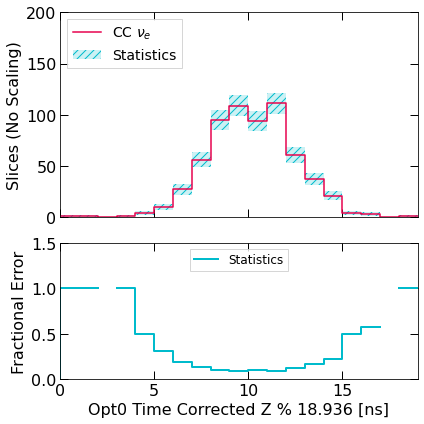

In [29]:
combine_error(ccnue_dict, nu_error_list)

#plot it
plot_combine_err(ccnue_dict, "ccnue", ccnue_label, nu_error_list, ifStatOnly = True)

plt.savefig(savePath+str("ccnue_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3>Scale to POT </h3>

1.2941367532561456


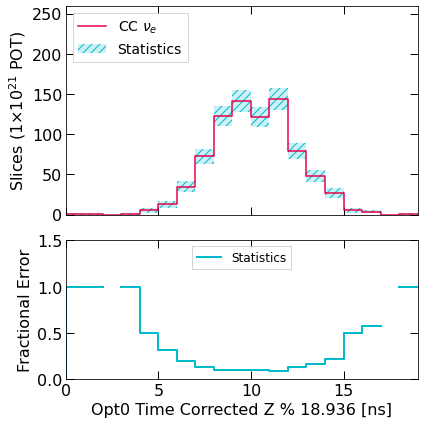

In [30]:
print(ccnue_scale_factor)

scale_cov_matrix(ccnue_dict, ccnue_scale_factor, nu_error_list)

#plot it
plot_combine_err(ccnue_dict, "ccnue", ccnue_label, nu_error_list
                 , ifScale = True, scaleYmax = ccnue_scale_factor, suffix ='_scale', ifStatOnly = True)

plt.savefig(savePath+str("ccnue_beam_bucket_combined_covariance_scaked.png"), dpi=200)
    
plt.show()

<h1>Fuse Neutrino Background Into One Please</h1>

In [78]:
nu_dict_list = [rockbox_dict, ncpi0_dict, ccnue_dict]

In [79]:
nu_dict = {}

nu_dict['cv_scale'] = np.array([0]*(len(bins)-1))
nu_dict['cv_plot_scale'] = np.array([0]*(len(bins)))

for d in nu_dict_list:
    nu_dict['cv_scale'] = nu_dict['cv_scale'] + d['cv_scale']
    nu_dict['cv_plot_scale'] = nu_dict['cv_plot_scale'] + d['cv_plot_scale']

In [80]:
fill_nan_plz(rockbox_dict)
fill_nan_plz(ncpi0_dict)
fill_nan_plz(ccnue_dict)

In [81]:
nu_dict['combined_cov_scale'] = new_empty_cov()

for err in nu_error_list:
    print(err)
    nu_dict[err+'_cov_scale'] = new_empty_cov()
    
    for d in nu_dict_list:
        nu_dict[err+'_cov_scale'] = nu_dict[err+'_cov_scale'] + d[err+'_cov_scale']
    
    nu_dict[err+'_err_scale'] = np.sqrt(np.diag(nu_dict[err+'_cov_scale']))
    
    nu_dict[err+'_cov_frac_scale'] = nu_dict[err+'_cov_scale'] / np.outer(nu_dict['cv_scale'], nu_dict['cv_scale'])
    nu_dict[err+'_frac_err_scale'] = np.sqrt(np.diag(nu_dict[err+'_cov_frac_scale']))
        
    nu_dict['combined_cov_scale'] = nu_dict['combined_cov_scale'] + nu_dict[err+'_cov_scale']
    
nu_dict['combined_err_scale'] = np.sqrt(np.diag( nu_dict['combined_cov_scale']))
    
nu_dict['combined_cov_frac_scale'] = nu_dict['combined_cov_scale'] / np.outer(nu_dict['cv_scale'], nu_dict['cv_scale'])
nu_dict['combined_frac_err_scale'] = np.sqrt(np.diag(nu_dict['combined_cov_frac_scale']))

stat


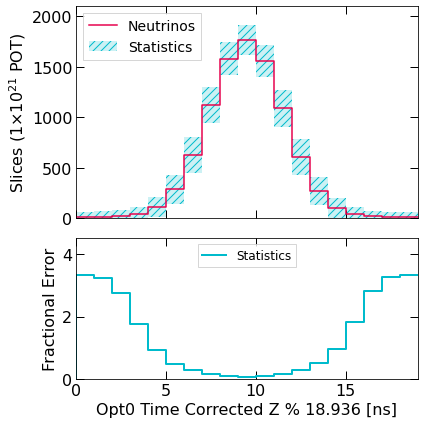

In [91]:
plot_combine_err(nu_dict, "nu", "Neutrinos", nu_error_list
                  , ifScale = True, suffix = '_scale', scaleYmax = 0.7, scaleY2max = 3, ifStatOnly = True)

plt.savefig(savePath+str("combined_neutrino_beam_bucket_combined_covariance_scaled.png"), dpi=200)
    
plt.show()

<h1>Fit Gaussian To Distribution</h1>

In [83]:
half_width = 18.936 /2 

def gaus_fixedmean(X, A, sigma, C):
    return A * np.exp( -( X - half_width )**2 / ( 2 * sigma**2 ) ) + C

Best fit parameters:
A = (1.75+/-0.10)e+03
sigma = 2.05+/-0.15
constant = (1+/-5)e+01


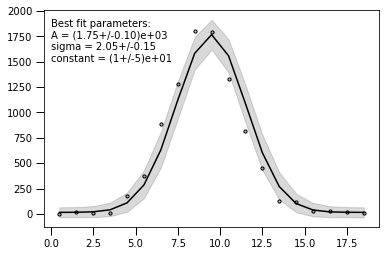

In [84]:
from scipy.optimize import curve_fit 
from uncertainties import ufloat

x_data = bins_mid
y_data = nu_dict['cv_scale']

prediction = [max(y_data), 1.308,  0]

lower_bound = [-np.inf,-np.inf, 0]

upper_bound = [np.inf, np.inf, np.inf]

param_bounds=(lower_bound, upper_bound)

parameters, covar = curve_fit(gaus_fixedmean, x_data, y_data, p0 = prediction, bounds=param_bounds) 
sigma_parameters = np.sqrt(np.diagonal(covar))

# an easy way to properly format parameter errors

fitA = ufloat(parameters[0], sigma_parameters[0])
fitSigma = ufloat(parameters[1], sigma_parameters[1])
fitC = ufloat(parameters[2], sigma_parameters[2])
text_res = "Best fit parameters:\nA = {}\nsigma = {}\nconstant = {}".format(fitA, fitSigma, fitC)
print(text_res)

plt.scatter(x_data, y_data, facecolor = 'silver',
            edgecolor = 'k', s = 10, alpha = 1)

# plotting the model
#hires_x = np.linspace(0, 19, 100)
hires_x = x_data


predict = gaus_fixedmean(hires_x, *parameters)
bound_upper = gaus_fixedmean(hires_x, *(parameters + sigma_parameters))
bound_lower = gaus_fixedmean(hires_x, *(parameters - sigma_parameters))
plt.plot(hires_x, predict, 'black')
# plotting the confidence intervals
plt.fill_between(hires_x, bound_lower, bound_upper,
                 color = 'black', alpha = 0.15)
plt.text(0, 1500, text_res)
#plt.ylim(0, 100)

plt.savefig(savePath+str("Gaussian_Fit_Bkg.png"), dpi=200)
    
plt.show()

In [87]:
print(x_data)
print(y_data)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5]
[1.29413675e+00 2.34591194e+01 1.23805040e+01 1.36746408e+01
 1.73311552e+02 3.70910768e+02 8.91058842e+02 1.28456181e+03
 1.80229664e+03 1.79458833e+03 1.33327341e+03 8.21381252e+02
 4.56480700e+02 1.30419753e+02 1.15371209e+02 2.99375550e+01
 2.45165836e+01 2.06341734e+01 5.42097142e+00]


In [88]:
(bound_upper - predict) / predict

array([3.32501082, 3.24018611, 2.76188584, 1.74679564, 0.92537788,
       0.50071757, 0.28246724, 0.1629934 , 0.10154228, 0.08315971,
       0.10409854, 0.16865223, 0.29280489, 0.51998452, 0.96414748,
       1.81370693, 2.81263123, 3.25235902, 3.32622488])

In [89]:
print(bound_upper)
print(bound_lower)

[  65.07409308   67.25370671   76.94376233  111.46967536  209.46959161
  428.9198019   809.95154288 1305.11058313 1744.16691907 1914.51002338
 1722.12509465 1272.76461035  780.99038333  410.1689527   200.2107
  107.8991668    75.8547608    66.98901896   65.02257478]
[ -34.74948846  -34.51078102  -32.70780548  -22.50070783   20.55821871
  154.62050544  457.43507044  936.47026958 1420.36588396 1620.53333381
 1394.94337251  902.82980876  432.08520391  141.7277458    15.89058935
  -23.73247056  -32.94776185  -34.54554997  -34.75325395]


In [90]:
nu_dict['cv_scale'] = predict
nu_dict['cv_plot_scale'] = np.insert(predict, 0, 0)
nu_dict['stat_err'] = bound_upper - predict
nu_dict['stat_err_scale'] = bound_upper - predict
nu_dict['stat_frac_err_scale'] = nu_dict['stat_err'] / nu_dict['cv_scale']

<h1> Cosmics </h1>

<h3>Statistics</h3>

In [ ]:
print(cos_flat_rebin)

cos_dict['cv'] = cos_flat_rebin
cos_dict['cv_plot'] = np.insert(cos_dict['cv'], 0, 0)

#This is the smart way
cos_stat_cov = np.diag(cos_flat_rebin) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
cos_stat_err = np.sqrt(np.diag(cos_stat_cov))

print("\n stat err")
print(cos_stat_err)

cos_dict['stat_cov'] = cos_stat_cov
cos_dict['stat_err'] = cos_stat_err

#plot it
plot_hatchy_hatch(cos_dict, "Cosmics", "cos", "stat_err")

plt.savefig(savePath+str("cosmic_stat_err.png"), dpi=200)

<h3>Scale to POT to Rockbox Number </h3>

In [ ]:
combine_error(cos_dict, cos_error_list)

scale_cov_matrix(cos_dict, rockbox_scale_factor, cos_error_list)

In [ ]:
plot_combine_err(cos_dict, "cos", cos_label, cos_error_list, ifScale = True, scaleYmax = 25, suffix = '_scale', ifStatOnly = True)

plt.savefig(savePath+str("combined_cosmics_err_scaled.png"), dpi=200)

<h1>Fuse Neutrino and Cosmics Into A Single Background</h1>

In [ ]:
fill_nan_plz(cos_dict)
fill_nan_plz(nu_dict)

In [ ]:
suffix = '1ns_bin_peak_edge_aggressive'

In [ ]:
bkg_dict = {}

#combine cv
bkg_dict['cv_scale'] = nu_dict['cv_scale'] + cos_dict['cv_scale'] 
bkg_dict['cv_plot_scale'] = nu_dict['cv_plot_scale'] + cos_dict['cv_plot_scale'] 

#combine stat errors
bkg_dict['stat_cov_scale'] = nu_dict['stat_cov_scale'] + cos_dict['stat_cov_scale']

bkg_dict['stat_err_scale'] = np.sqrt(np.diag(bkg_dict['stat_cov_scale']))

bkg_dict['stat_cov_frac_scale'] = bkg_dict['stat_cov_scale'] / np.outer(bkg_dict['cv_scale'], bkg_dict['cv_scale'])
bkg_dict['stat_frac_err_scale'] = np.sqrt(np.diag(bkg_dict['stat_cov_frac_scale']))

#flux / xsec / g4 are taken directly from neutrino samples

bkg_dict['flx_err_scale'] = nu_dict['flx_frac_err_scale']
bkg_dict['xsec_err_scale'] = nu_dict['xsec_frac_err_scale']
bkg_dict['g4_err_scale'] = nu_dict['g4_frac_err_scale']

bkg_dict['flx_frac_err_scale'] = nu_dict['flx_frac_err_scale']
bkg_dict['xsec_frac_err_scale'] = nu_dict['xsec_frac_err_scale']
bkg_dict['g4_frac_err_scale'] = nu_dict['g4_frac_err_scale']

#quadrature sum each uncertainty
bkg_dict['combined_err_scale'] = np.array([0]*(len(bins)-1))
bkg_dict['combined_frac_err_scale'] = np.array([0]*(len(bins)-1))

for err in nu_error_list:
    print(err)
    bkg_dict['combined_err_scale'] = bkg_dict['combined_err_scale'] + bkg_dict[err+'_err_scale']**2
    bkg_dict['combined_frac_err_scale'] = bkg_dict['combined_frac_err_scale'] + + bkg_dict[err+'_frac_err_scale']**2
    
bkg_dict['combined_err_scale'] = np.sqrt(bkg_dict['combined_err_scale'])
bkg_dict['combined_frac_err_scale'] = np.sqrt(bkg_dict['combined_frac_err_scale'])

In [ ]:
plot_combine_err(bkg_dict, "nu", "Neutrino + Cosmic Background"
                 , nu_error_list
                 , ifScale = True, scaleYmax = 1, suffix = '_scale', ifStatOnly =True)

plt.savefig(savePath+str("full_background_err.png"), dpi=200)

<h1>Save HNL </h1>

In [ ]:
hnl_dict_save = {}

In [ ]:
hnl_dict_save['U'] = fitU

hnl_dict_save['m'] = m

hnl_dict_save['signal'] = hnl_dict['cv_scale'].tolist()

hnl_dict_save['stat_err'] = hnl_dict['stat_err_scale'].tolist()

hnl_dict_save['flx_err'] = hnl_dict['flx_err_scale'].tolist()

hnl_dict_save['mistagging_err'] = hnl_dict['mistagging_err_scale'].tolist()

hnl_dict_save['combined_err'] = hnl_dict['combined_err_scale'].tolist()

In [ ]:
for k,v in zip(hnl_dict_save.keys(), hnl_dict_save.values()):
    print(k, v)

In [ ]:
np.save("../pkl_files/v3_April2024/hnl_m"+str(m)+"_v3_dict_"+suffix+".npy", hnl_dict_save) 

<h1>Save Neutrinos + Cosmics Background </h1>

In [ ]:
bkg_save_dict = {}

bkg_save_dict['bkg'] = bkg_dict['cv_scale'].tolist()

bkg_save_dict['stat_err'] = bkg_dict['stat_err_scale'].tolist()

bkg_save_dict['flx_err'] = bkg_dict['flx_err_scale'].tolist()

bkg_save_dict['xsec_err'] = bkg_dict['xsec_err_scale'].tolist()

bkg_save_dict['g4_err'] = bkg_dict['g4_err_scale'].tolist()

bkg_save_dict['combined_err'] = bkg_dict['combined_err_scale'].tolist()

In [ ]:
for k,v in zip(bkg_save_dict.keys(), bkg_save_dict.values()):
    print(k, v)

In [ ]:
np.save("../pkl_files/v3_April2024/bkg_v3_dict_"+suffix+".npy", bkg_save_dict) 

<h1>Save Neutrinos Background </h1>

In [ ]:
nu_save_dict = {}

nu_save_dict['bkg'] = nu_dict['cv_scale'].tolist()

nu_save_dict['stat_err'] = nu_dict['stat_err_scale'].tolist()

nu_save_dict['flx_err'] = nu_dict['flx_err_scale'].tolist()

nu_save_dict['xsec_err'] = nu_dict['xsec_err_scale'].tolist()

nu_save_dict['g4_err'] = nu_dict['g4_err_scale'].tolist()

nu_save_dict['combined_err'] = nu_dict['combined_err_scale'].tolist()


In [ ]:
for k,v in zip(bkg_save_dict.keys(), bkg_save_dict.values()):
    print(k, v)

In [ ]:
np.save("../pkl_files/v3_April2024/nu_v3_dict_"+suffix+".npy", nu_save_dict) 

<h1>Save Rockbox Cosmics Background </h1>

In [ ]:
cos_save_dict = {}

cos_save_dict['bkg'] = cos_dict['cv_scale'].tolist()

cos_save_dict['stat_err'] = cos_dict['stat_err_scale'].tolist()

In [ ]:
for k,v in zip(cos_save_dict.keys(), cos_save_dict.values()):
    print(k, v)

In [ ]:
np.save("../pkl_files/v3_April2024/cos_v3_dict_"+suffix+".npy", cos_save_dict) 

###### 